In [1]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
!mkdir /home/aistudio/external-libraries
# 安装pandas到指定目录
!pip install pandas -t /home/aistudio/external-libraries

# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

mkdir: 无法创建目录"/home/aistudio/external-libraries": 文件已存在
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 5.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 6.2 MB/s eta 0:00:0000:0100:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
parl 1.4.1 requires pyzmq==18.1.1, but you have pyzmq 23.2.1 which is incompatible.
paddlefsl 1.0.0 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
paddlefsl 1.0.0 requires tqdm~=4.27.0, but you have tqdm 4.64.1 which is incompatible.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: pip install 

In [2]:
#导入需要的包
import os
import numpy as np
from PIL import Image
import cv2
import paddle
import matplotlib.pyplot as plt
from paddle.io import Dataset
from paddle.vision.transforms import Compose, Normalize

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


# 一、数据处理

**1. 解压数据集**

In [3]:
#解压数据集
import zipfile
src_path="/home/aistudio/data/data179734/fish_image.zip"
target_path="/home/aistudio/fish_image"
if(not os.path.isdir(target_path)):
    z = zipfile.ZipFile(src_path, 'r')
    z.extractall(path=target_path)
    z.close()

**2. 数据集定义**

In [4]:
class MyDataset(Dataset): 
    # 定义数据 读取方式 
    def __init__(self, data_dir, label_path, transform=None): 
        super(MyDataset, self). __init__() 
        self.data_list = [] 
        with open (label_path,encoding='utf-8') as f: 
            for line in f.readlines(): 
                image_path, label=line.strip().split('\t') 
                image_path = os.path.join(data_dir, image_path) 
                self.data_list.append([image_path, label]) 
        self.transform= transform 
    # 定义 指定index时如何获取数据 
    def __getitem__(self,index):
        image_path,label = self.data_list[index]
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        image = image.astype('float32')
        if self.transform is not None:
            image = self.transform(image)
        label = np.array([label],dtype = "int64")
        return image,label
    # 返回数据集总数
    def __len__(self):
        return len(self.data_list)

**3. 数据预处理**

In [5]:
import paddle.vision.transforms as T
transform =T.Compose([T.Resize((47,47)),T.RandomHorizontalFlip(0.5),T.ToTensor(),T.Normalize(mean=[127.5,127.5,127.5],std=[127.5,127.5,127.5])])
transform_test =T.Compose([T.Resize((47,47)),T.ToTensor(),T.Normalize(mean=[127.5,127.5,127.5],std=[127.5,127.5,127.5])])
# 打印
train_dataset = MyDataset('fish_image/','fish_image/train.txt',transform)
test_dataset = MyDataset('fish_image/','fish_image/eval.txt',transform)
print('train_dataset images:',len(train_dataset),'test_dataset images',len(test_dataset))


train_dataset images: 14550 test_dataset images 1620


**4. 数据集封装**

batch_id:0,训练数据hape:[64, 3, 47, 47],标签数据shape:[64, 1]
train data0 的标签为:Tensor(shape=[1], dtype=int64, place=Place(gpu:0), stop_gradient=True,
       [4])


W1210 19:22:00.426654   302 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 11.2, Runtime API Version: 11.2
W1210 19:22:00.431824   302 gpu_resources.cc:91] device: 0, cuDNN Version: 8.2.
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/image.py:425: DeprecationWarning: np.asscalar(a) is deprecated since 

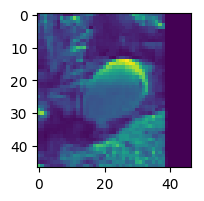

In [6]:
# 定义并初始化数据读取器
train_loader = paddle.io.DataLoader(train_dataset,batch_size=64,shuffle=True,num_workers=1)
# 调用并迭代读取数据
for batch_id,data in enumerate(train_loader()):
    images,labels = data
    print("batch_id:{},训练数据hape:{},标签数据shape:{}".format(batch_id,images.shape,labels.shape))
    plt.figure(figsize=(2,2))
    plt.imshow(images[0][0])
    print('train data0 的标签为:'+str(labels[0]))
    break

# 二、模型设计

In [7]:
import paddle.nn.functional as F
class MyCNN(paddle.nn.Layer):
    def __init__(self):
        super(MyCNN,self).__init__()
        self.conv1 = paddle.nn.Conv2D(in_channels=3, out_channels=20, kernel_size=5,stride=1)        
        self.pool1 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
        self.conv2 = paddle.nn.Conv2D(in_channels=20, out_channels=50, kernel_size=5,stride=1)
        self.pool2 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
        self.conv3 = paddle.nn.Conv2D(in_channels=50, out_channels=50, kernel_size=5,stride=1)
        self.pool3 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
        self.linear1 = paddle.nn.Linear(in_features=200, out_features=5)
    
    def forward(self,input):
        x = self.conv1(input)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = self.pool3(x)
        x = paddle.flatten(x, start_axis=1,stop_axis=-1)  
        x = self.linear1(x)
        x=F.softmax(x)
        return x

# 三、模型训练

**训练模型**

In [8]:
myCnn=MyCNN()
epochs = 10
optim = paddle.optimizer.Adam(learning_rate=0.001,parameters=myCnn.parameters())
loss_fn = paddle.nn.CrossEntropyLoss()
myCnn.train()
acclist=[]
losslist=[]
for epoch in range(epochs):
    for batch_id,data in enumerate(train_loader()):
        x_data = data[0]
        y_data = data[1]
        predicts = myCnn(x_data)
        loss=loss_fn(predicts,y_data)   #计算损失
        acc=paddle.metric.accuracy(predicts,y_data) #计算准确率
        # 反向传播
        loss.backward()
        if(batch_id+1)%100==0:
            print("epoch:{},batch_id:{},loss is: {},acc is :{}".format(epoch,batch_id+1,loss.numpy(),acc.numpy()))
        acclist.append(acc.numpy()[0])
        losslist.append(loss.numpy()[0])
        # 更新参数
        optim.step()
        # 梯度清零
        optim.clear_grad()

epoch:0,batch_id:100,loss is: [1.0711641],acc is :[0.859375]
epoch:0,batch_id:200,loss is: [0.971072],acc is :[0.953125]
epoch:1,batch_id:100,loss is: [0.95165217],acc is :[0.96875]
epoch:1,batch_id:200,loss is: [0.93914664],acc is :[0.96875]
epoch:2,batch_id:100,loss is: [0.9669565],acc is :[0.921875]
epoch:2,batch_id:200,loss is: [0.97788614],acc is :[0.921875]
epoch:3,batch_id:100,loss is: [0.94466436],acc is :[0.96875]
epoch:3,batch_id:200,loss is: [0.93909574],acc is :[0.953125]
epoch:4,batch_id:100,loss is: [0.92037237],acc is :[0.984375]
epoch:4,batch_id:200,loss is: [0.92016447],acc is :[0.984375]
epoch:5,batch_id:100,loss is: [0.9553946],acc is :[0.96875]
epoch:5,batch_id:200,loss is: [0.9308288],acc is :[0.984375]
epoch:6,batch_id:100,loss is: [0.9106849],acc is :[1.]
epoch:6,batch_id:200,loss is: [0.9607725],acc is :[0.9375]
epoch:7,batch_id:100,loss is: [0.91488457],acc is :[0.984375]
epoch:7,batch_id:200,loss is: [0.90727806],acc is :[1.]
epoch:8,batch_id:100,loss is: [0.9

**acc曲线**

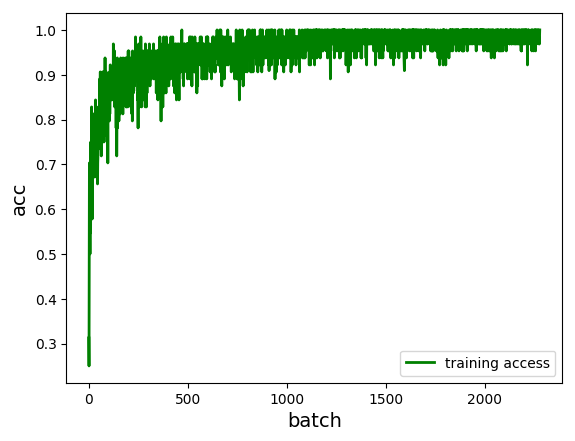

In [9]:
x=np.arange(len(acclist))
plt.plot(x, acclist, 'g', linewidth=2, label='training access')
plt.xlabel('batch', fontsize=14)
plt.ylabel('acc', fontsize=14)
plt.legend()
plt.show()

**loss曲线**

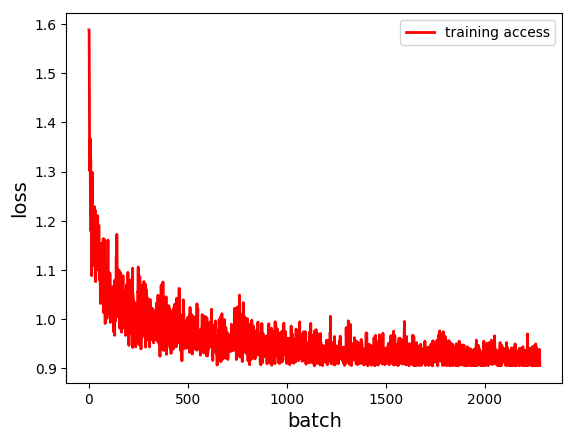

In [10]:
x=np.arange(len(acclist))
plt.plot(x, losslist, 'r', linewidth=2, label='training access')
plt.xlabel('batch', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()
plt.show()

# 四、模型评估与推理

**测试集上的准确率**

In [11]:
# 加载测试数据集
test_loader = paddle.io.DataLoader(test_dataset,batch_size=64,drop_last=True)
# 设置损失函数
loss_fn = paddle.nn.CrossEntropyLoss()
myCnn.eval()
for batch_id,data in enumerate(test_loader()):
    x_data=data[0]
    y_data=data[1]
    predicts = myCnn(x_data)
    loss=loss_fn(predicts,y_data)
    acc=paddle.metric.accuracy(predicts,y_data)
    # if(batch_id+1) % 10 == 0:
    print("batch_id:{},loss is: {}".format(batch_id+1,loss.numpy(),acc.numpy()))


batch_id:1,loss is: [0.9064715]
batch_id:2,loss is: [0.93691313]
batch_id:3,loss is: [0.93731606]
batch_id:4,loss is: [0.9054413]
batch_id:5,loss is: [0.911796]
batch_id:6,loss is: [0.90693367]
batch_id:7,loss is: [0.9210707]
batch_id:8,loss is: [0.94057673]
batch_id:9,loss is: [0.9399303]
batch_id:10,loss is: [0.9286661]
batch_id:11,loss is: [0.9283428]
batch_id:12,loss is: [0.9104049]
batch_id:13,loss is: [0.9209669]
batch_id:14,loss is: [0.9551649]
batch_id:15,loss is: [0.92044395]
batch_id:16,loss is: [0.90766203]
batch_id:17,loss is: [0.9168379]
batch_id:18,loss is: [0.9214362]
batch_id:19,loss is: [0.9174899]
batch_id:20,loss is: [0.9472358]
batch_id:21,loss is: [0.90718365]
batch_id:22,loss is: [0.99094796]
batch_id:23,loss is: [0.91437435]
batch_id:24,loss is: [0.9208674]
batch_id:25,loss is: [0.9215418]


**前10张图像的推理结果**

真实标签:3,预测标签:3


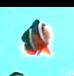

真实标签:3,预测标签:3


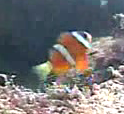

真实标签:0,预测标签:0


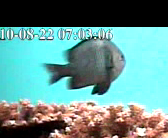

真实标签:2,预测标签:2


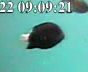

真实标签:4,预测标签:4


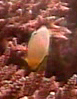

真实标签:3,预测标签:3


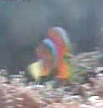

真实标签:0,预测标签:0


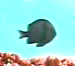

真实标签:4,预测标签:4


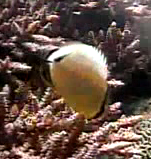

真实标签:2,预测标签:2


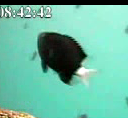

真实标签:3,预测标签:3


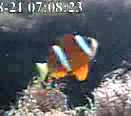

In [12]:
data_dir='fish_image/'
label_path='fish_image/eval.txt'
temp_test_dataset_pred=MyDataset(data_dir,label_path,transform)
temp_loader_pred=paddle.io.DataLoader(temp_test_dataset_pred,batch_size=1,drop_last=True,shuffle=False)
image_num = 0 
list_num=0
data_list = [] 
# 获取前10张图片路径
with open (label_path,encoding='utf-8') as f: 
    for line in f.readlines(): 
        if(list_num>9):
            break
        image_path, label=line.strip().split('\t') 
        image_path = os.path.join(data_dir, image_path) 
        data_list.append([image_path, label]) 
        list_num+=1

# 获得前10张图片预测结果
for batch_id, data in enumerate(temp_loader_pred()) : 
    if(image_num>9):
        break
    img_show = data[0] 
    label_show = data[1] 
    pred_label_show = myCnn(img_show)[0].argmax()
    print('真实标签:{},预测标签:{}'.format(data_list[image_num][1],pred_label_show[0].item()))
    img = Image.open(data_list[batch_id][0])
    display(img)
    image_num+=1

In [13]:
# 保存myDnn参数 
paddle.save(myCnn.state_dict(),"linear_net.pdparams")
# 保存优化器参数
paddle.save(optim.state_dict(),"optim.pdopt")